# Motion blur metric idea
Idea is to find a simple metric which can descibe if an image is blured then maybe hold ratio of blurred images up to non blurred image much like brightness metric idea.


Many methods can be found as it is already a studied field. Methods such as fast fourier transform on a image then looking at the high and low frequency components can lead to making a difficult decision for where to place the thresholds of what constitutes a "high" amount of high frequency components etc. 

Having therefore searched for already existing algorithms/studies for different methods most of them looking at grayscale statistics. There is a different method: variation of the Laplacian [study](https://ieeexplore.ieee.org/document/903548) that will give us a singular value for each image to determine if an image is blurry.  

In [1]:
# Import statements
from imageio import imread, imwrite
from pylab import *
from skimage.util import img_as_ubyte, img_as_float
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import imshow
from copy import copy
import os
import sys

In [2]:
# Routinely have to update this import so it is seperated from the other imports
# Import local code
bachelorpath = os.path.normpath(os.getcwd() + os.sep + os.pardir)
scriptpath = bachelorpath + '/scripts/'
sys.path.insert(0, scriptpath)
import BP_ratio as bp
import dataset_plotting as dp
import motion_blur as mb 

In [3]:
# Reading image:
maden= imread(bachelorpath + '/Images/Maden.jpg')
# Load to grayscale:
maden_gs = bp.load_to_colorspace(maden,"GRAY")

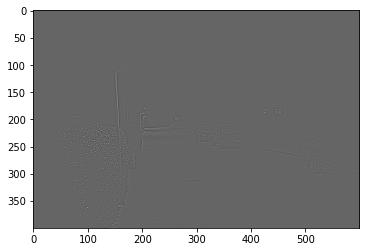

In [4]:
imshow(cv2.Laplacian(maden_gs, cv2.CV_64F), cmap="binary")

In [5]:
# Use Laplacian with openCV
cv2.Laplacian(maden_gs, cv2.CV_64F).var()

354.2511778916494

Lower values indicate if an image is more "blurry" if wanting to classify an image as blurry or not blurry you would need a threshold to decide.

In [6]:
# Test for a bigger dataset here try E45 images which are of relatively low quality but still not very affected by blur.
import os
datapath = bachelorpath + "/Images/E45/"
datalist = os.listdir(datapath)
res = []
prev = 0
saved = 0
for file in datalist:
    image = bp.load_to_colorspace(imread(os.path.join(datapath, file)), "GRAY")
    x = mb.motion_blur_laplacian(image)
    res.append(x)
    if x > prev:
        saved = cv2.Laplacian(image, cv2.CV_64F)
res  

[833.8979481336804,
 893.1499011905988,
 834.3723111891746,
 767.7088455071344,
 881.8737632159763,
 845.48735588683,
 857.7899650671642,
 852.0697673604329,
 858.5324112913343,
 857.2430853141682,
 929.5956176296231,
 879.2217276379798,
 839.3937799370659,
 831.9850176859541]

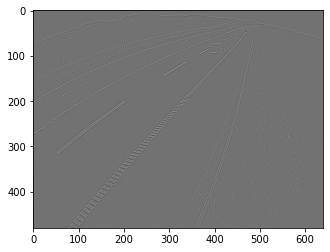

In [7]:
# show image with largest variance after laplacian filter has been applied.
imshow(saved, cmap="binary")

Scanning next folder current total of images processed:  2273
Scanning next folder current total of images processed:  4546


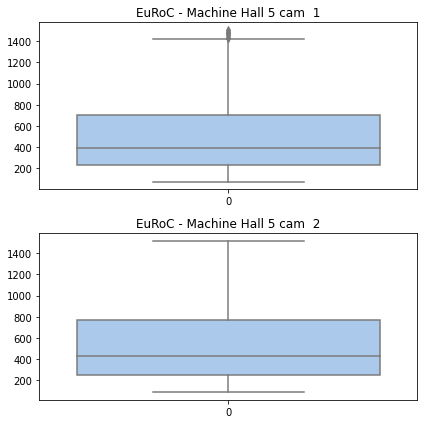

In [8]:
# can run through machine hall 5 (EuRoC) using this function 
mb_euroc_mh5 = mb.load_euroc_dataset(True)
dp.create_mb_boxplot(mb_euroc_mh5, "EuRoC - Machine Hall 5 cam")

Scanning next folder current total of images processed:  3682
Scanning next folder current total of images processed:  7364


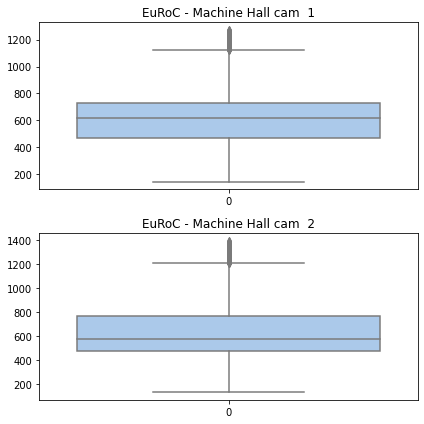

In [9]:
# machine hall 1 (EuRoC) 
mb_euroc_mh1 = mb.load_euroc_dataset(True)
dp.create_mb_boxplot(mb_euroc_mh1, "EuRoC - Machine Hall cam")